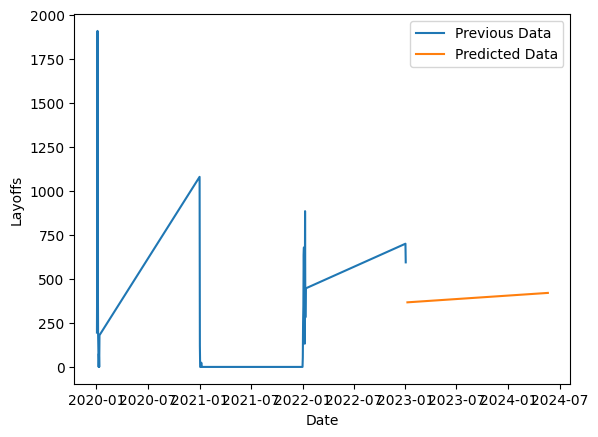

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read in the CSV file containing layoff data
df = pd.read_csv("final_sd.csv")

# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the number of days since the first date in the dataset
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Extract the X and Y variables
X = np.array(df['Days']).reshape(-1, 1)
Y = np.array(df['Layoffs'])

# Create the linear regression model and fit it to the data
model = LinearRegression().fit(X, Y)

# Use the model to predict the layoff numbers for the next 5 years
future_days = np.arange(df['Days'].max() + 1, df['Days'].max() + 500)
future_X = future_days.reshape(-1, 1)
future_Y = model.predict(future_X)

# Plot the original data and the predicted data
plt.plot(df['Date'], df['Layoffs'], label='Previous Data')
plt.plot(df['Date'].iloc[5] + pd.to_timedelta(future_days, unit='D'), future_Y, label='Predicted Data')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Layoffs')
plt.show()
